In [ ]:
# Libraries

import numpy as np
import graphics as grph
import ipywidgets as widgets
import warnings

In [3]:
# This avoids warning messages caused by large exponential values
warnings.filterwarnings("ignore", category=RuntimeWarning)
np.seterr(over='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [4]:
# Constants CGS
c = 2.9979e10 # cm s^-1
kb = 1.3806e-16 # erg K^-1
h = 6.626e-27 # erg s^-1
sigma = 5.6704e-5 # erg s^-1 cm^-2 K^-4

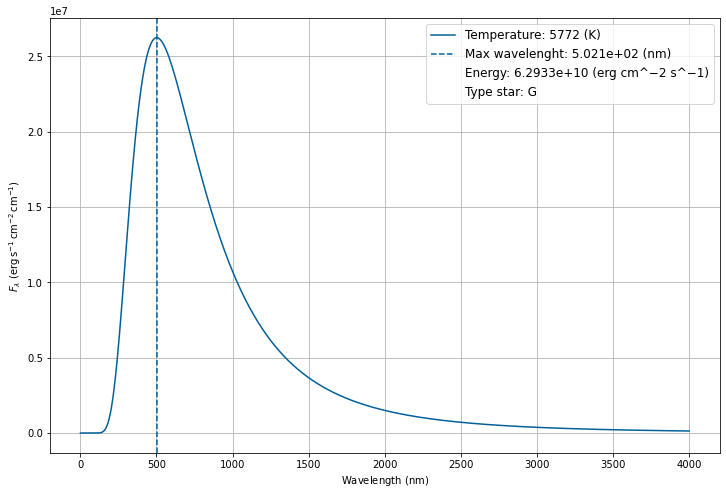

In [10]:
grph.plot_by_temperature(5772) #Plot for Sun temperature

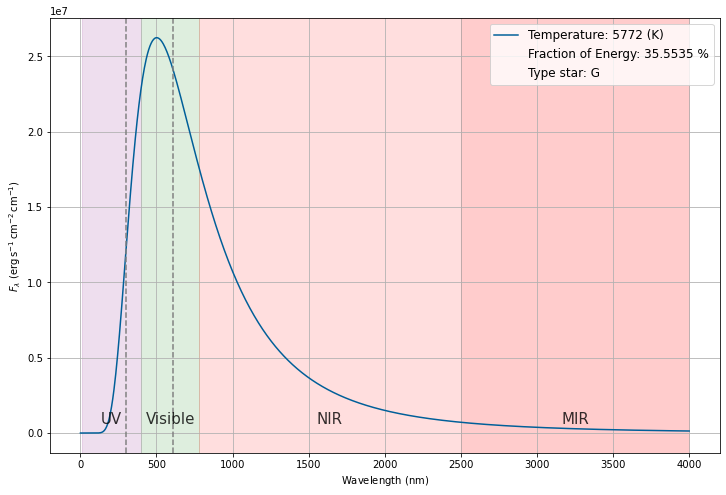

In [12]:
grph.plot_energy_in_a_range(5772, 300, 610)

### Interactive plots with widgets

In [5]:
widgets.interact(grph.plot_by_temperature, T = widgets.FloatSlider(value=3000, min=500, max= 35000, step=1, description = "T (K)", layout={'width': '600px'}))

interactive(children=(FloatSlider(value=3000.0, description='T (K)', layout=Layout(width='600px'), max=35000.0…

<function graphics.plot_by_temperature(T)>

In [6]:
widgets.interact(grph.plot_energy_in_a_range, T = widgets.FloatSlider(value=3000, min=500, max= 35000, step=1, description = "T (K)", layout={'width': '600px'}), 
         lmbda1 = widgets.FloatText(value=400, description='λ₁ (nm)'), 
         lmbda2 = widgets.FloatText(value=700, description='λ₂ (nm)'))

interactive(children=(FloatSlider(value=3000.0, description='T (K)', layout=Layout(width='600px'), max=35000.0…

<function graphics.plot_energy_in_a_range(T, lmbda1, lmbda2)>

In [66]:
help(planck_law)

Help on function planck_law in module __main__:

planck_law(T)
    Calculates the Planck distribution function, describing the radiation emitted
    by a black body as a function of the wavelength and temperature, expressed in nanometers.
    
    PARAMETERS:
        
       T (float): Temperature of the black body in Kelvin
    
    RETURN:
        tuple:
    
        - wavelength (np.ndarray): Array of wavelenghts in nanometers.
        - planck_function_nm (np.ndarray): Spectral energy density (erg·s⁻¹·cm⁻²·nm⁻¹) for
        each wavelength
    
    Note:
    
        The internal function is calculated in CGS units and then is converted to nanometers multiplying by 1e-7.

